In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns

import warnings 
from scipy import stats
from scipy.stats import norm
warnings.filterwarnings('ignore')

In [39]:
train_d=pd.read_csv('train_agriculture.csv')
test_d=pd.read_csv('test_agri.csv')

In [40]:
train_d.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [41]:
test_d.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [42]:
train_d.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

In [43]:
test_d.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          5893
Number_Weeks_Quit             0
Season                        0
dtype: int64

In [44]:
train_d['train_or_test']='train'
test_d['train_or_test']='test'
df=pd.concat([train_d,test_d])

In [45]:
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,train_or_test
0,F00000001,188,1,0,1,0,0.0,0,1,0.0,train
1,F00000003,209,1,0,1,0,0.0,0,2,1.0,train
2,F00000004,257,1,0,1,0,0.0,0,2,1.0,train
3,F00000005,257,1,1,1,0,0.0,0,2,1.0,train
4,F00000006,342,1,0,1,0,0.0,0,2,1.0,train


In [46]:
df.isnull().sum()

ID                             0
Estimated_Insects_Count        0
Crop_Type                      0
Soil_Type                      0
Pesticide_Use_Category         0
Number_Doses_Week              0
Number_Weeks_Used          14893
Number_Weeks_Quit              0
Season                         0
Crop_Damage                59310
train_or_test                  0
dtype: int64

In [47]:
df['Number_Weeks_Used']=df['Number_Weeks_Used'].fillna(df['Number_Weeks_Used'].mode()[0])

In [48]:
df.isnull().sum()

ID                             0
Estimated_Insects_Count        0
Crop_Type                      0
Soil_Type                      0
Pesticide_Use_Category         0
Number_Doses_Week              0
Number_Weeks_Used              0
Number_Weeks_Quit              0
Season                         0
Crop_Damage                59310
train_or_test                  0
dtype: int64

Text(0.5, 1.0, 'Density plot of Estimated_Insects_Count')

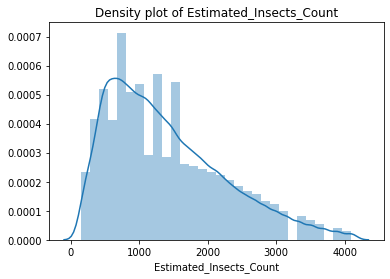

In [49]:
sns.distplot(df['Estimated_Insects_Count'], kde = True, hist = True, bins= 30)
plt.title("Density plot of Estimated_Insects_Count")

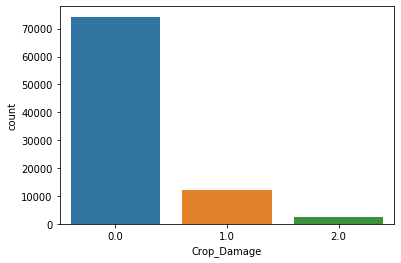

In [50]:
sns.countplot(df['Crop_Damage'])

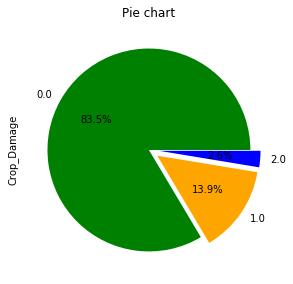

In [51]:
plt.subplot(1,2,2)
count = df['Crop_Damage'].value_counts()
count.plot.pie(autopct = '%1.1f%%',colors=['green','orange','blue'], figsize = (10,7),explode = [0,0.1,0.1],title = "Pie chart")

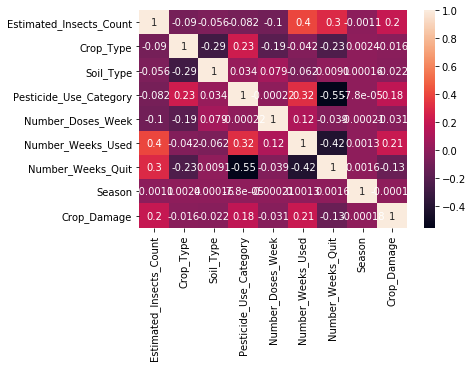

In [52]:
sns.heatmap(df.corr(), annot=True)

In [53]:
train=df.loc[df.train_or_test.isin(['train'])]
test=df.loc[df.train_or_test.isin(['test'])]
train.drop(columns={'train_or_test'},axis=1,inplace=True)
test.drop(columns={'train_or_test'},axis=1,inplace=True)

In [54]:
train.drop('ID',axis=1,inplace=True)
train.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0.0
1,209,1,0,1,0,0.0,0,2,1.0
2,257,1,0,1,0,0.0,0,2,1.0
3,257,1,1,1,0,0.0,0,2,1.0
4,342,1,0,1,0,0.0,0,2,1.0


In [55]:
train.shape

(88858, 9)

In [56]:
test.drop(['ID','Crop_Damage'],axis=1,inplace=True)
test.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188,1,1,1,0,20.0,0,2
1,410,1,1,1,0,0.0,0,2
2,626,1,0,1,0,0.0,0,2
3,731,1,0,1,0,0.0,0,2
4,789,0,0,1,0,0.0,0,1


In [57]:
test.shape

(59310, 8)

In [58]:
X_train, Y = train.drop(["Crop_Damage"], axis=1).values, train["Crop_Damage"].values
X_test = test.values

X_train.shape, Y.shape, X_test.shape

((88858, 8), (88858,), (59310, 8))

In [59]:
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
from catboost import CatBoostClassifier

from xgboost import XGBClassifier
from xgboost import plot_importance

from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [60]:
num_class1, num_class2, num_class3 = Counter(Y)[0], Counter(Y)[1], Counter(Y)[2]

print(num_class1)
print(num_class2)
print(num_class3)

74238
12307
2313


In [61]:
Counter(Y)

Counter({0.0: 74238, 1.0: 12307, 2.0: 2313})

In [62]:
kfold, scores = KFold(n_splits=5, shuffle=True, random_state=0), list()
for train, test in kfold.split(X_train):
    x_train, x_test = X_train[train], X_train[test]
    y_train, y_test = Y[train], Y[test]
    
    num_class1, num_class2, num_class3 = Counter(y_train)[0], Counter(y_train)[1], Counter(y_train)[2]
    sm = SMOTE(random_state=27, sampling_strategy={0: int(1.3*num_class1), 1: int(7*num_class2), 2: int(3.2*num_class3)})
    x_train, y_train = sm.fit_resample(x_train, y_train)
    
    model = LGBMClassifier(random_state=27, max_depth=6, n_estimators=400)
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    score = f1_score(y_test, preds, average="weighted")
    scores.append(score)
    print(score)
print("Average: ", sum(scores)/len(scores))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
0.8165952270438975
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
0.8194449415663131
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
0.8118340353509231
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
0.8160797527170426
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
0.8183455674974004
Average:  0.8164599048351153


In [63]:
sm = SMOTE(random_state=27, sampling_strategy={0: int(1.3*num_class1), 1: int(7*num_class2), 2: int(3.2*num_class3)})
x_train, y_train = sm.fit_resample(x_train, y_train)

model1 = LGBMClassifier(random_state=27, max_depth=6, n_estimators=800)
model1.fit(X_train, Y)
preds = model1.predict_proba(X_test)
preds[0]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


array([2.07523000e-01, 7.91858032e-01, 6.18967419e-04])

In [ ]:
df=pd.DataFrame(preds)
df.to_csv('Agriculture Dataset model.csv')